<a href="https://colab.research.google.com/github/siddharthramagiri/Machine-Learning/blob/main/Diabetes_(KNN)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [37]:
dataset = pd.read_csv('/content/diabetes.csv')
print(dataset.shape)
dataset.head(8)

(769, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [38]:
# We can accept zeros in Pregnancies, DiabetesFunction
remove_zeros = ['Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']
for col in remove_zeros :
  dataset[col] = dataset[col].replace(0,np.NaN)
  mean = int(dataset[col].mean(skipna=True))
  dataset[col] = dataset[col].replace(np.NaN,mean)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [40]:
# Labeling as Features and Targets
X = dataset.iloc[:,:8]
Y = dataset.iloc[:,8]

In [41]:
# splitting into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=3,test_size=0.2)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
# Defined KNN

In [88]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [89]:
Y_predicted = classifier.predict(X_test)
Y_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [90]:
ConfuseMatrix = confusion_matrix(Y_predicted,Y_test)
ConfuseMatrix

array([[78, 31],
       [11, 34]])

In [92]:
accuracy_score(Y_test,Y_predicted)

0.7272727272727273

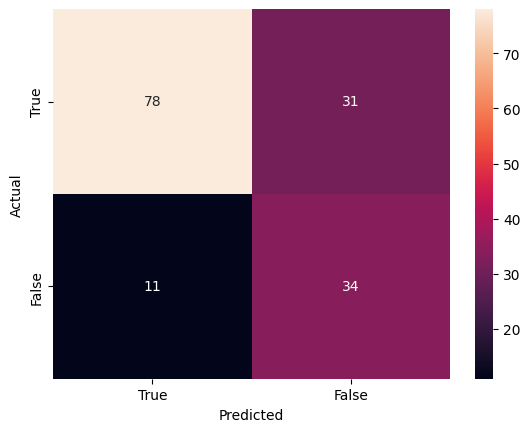

In [94]:
import seaborn as sns

sns.heatmap(ConfuseMatrix,xticklabels=['True','False'],yticklabels=['True','False'],annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()